<>:26: SyntaxWarning: invalid escape sequence '\,'
<>:26: SyntaxWarning: invalid escape sequence '\,'
/var/folders/7x/xhxbb2nx0wg7t_47z03sctz00000gq/T/ipykernel_54730/1463339169.py:26: SyntaxWarning: invalid escape sequence '\,'
  plt.plot(x, func_form(x), 'r:', label='$f(x) = x\,\sin(x)$')


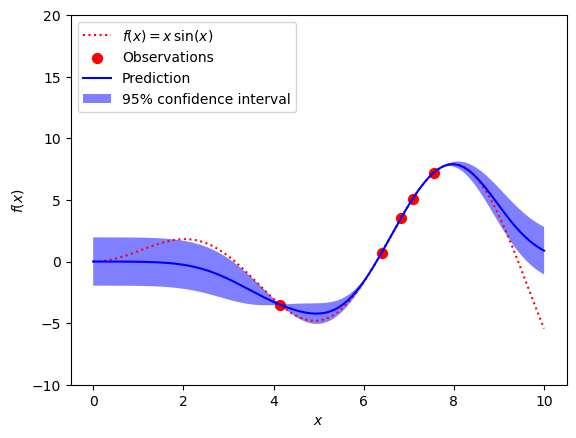

In [31]:
import numpy as np
import matplotlib.pyplot as plt


def func_form(input_x):
    return input_x * np.sin(input_x)
XLIM =10

N_SAMPLE = 5

X = np.random.rand(N_SAMPLE, 1) * XLIM
# y = 2 + 3 * X + np.random.randn(N_SAMPLE, 1)
y =  func_form(X) #+ np.random.randn(N_SAMPLE, 1)
# gaussian process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
# gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp = GaussianProcessRegressor()
gp.fit(X, y)

x = np.atleast_2d(np.linspace(0, XLIM, 1000)).T
y_pred, sigma = gp.predict(x, return_std=True)

plt.figure()
plt.plot(x, func_form(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.scatter(X.ravel(), y,  label='Observations', color='r', s=50)
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

In [9]:
X.shape

(5, 1)

In [10]:
y.shape

(5, 1)

In [11]:
X.ravel()

array([3.40135066, 9.29274928, 5.93803752, 7.08168191, 2.25326392])

In [13]:
x.shape

(1000, 1)